# Bike Assignment using Linear Regression

# Problem Statement
__A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state__

# Business Goal:
_You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market_

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# Importing day.csv
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
df.drop(['instant'],axis=1,inplace=True)

In [5]:
df.drop(['dteday'],axis=1,inplace=True)

In [6]:
df.drop(['casual','registered'],axis=1,inplace=True)

In [7]:
df.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [8]:
df.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [9]:
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [10]:
df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [12]:
df['weathersit'].replace({1:"Clear Clouds",2:"Mist cloudy",3:"Light rain",4:'Heavy Rain'},inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
df.weathersit.value_counts()

Clear Clouds    463
Mist cloudy     246
Light rain       21
Name: weathersit, dtype: int64

In [14]:
df['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
df['mnth'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',5:'May', 6:'Jun', 7:'Jul', 8:'Aug',9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'},inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
df[['temp','atemp','hum','windspeed','cnt']]=df[['temp','atemp','hum','windspeed','cnt']].apply(pd.to_numeric)

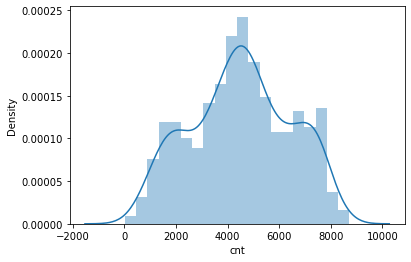

In [17]:
sns.distplot(df.cnt, bins = 20)
plt.show()

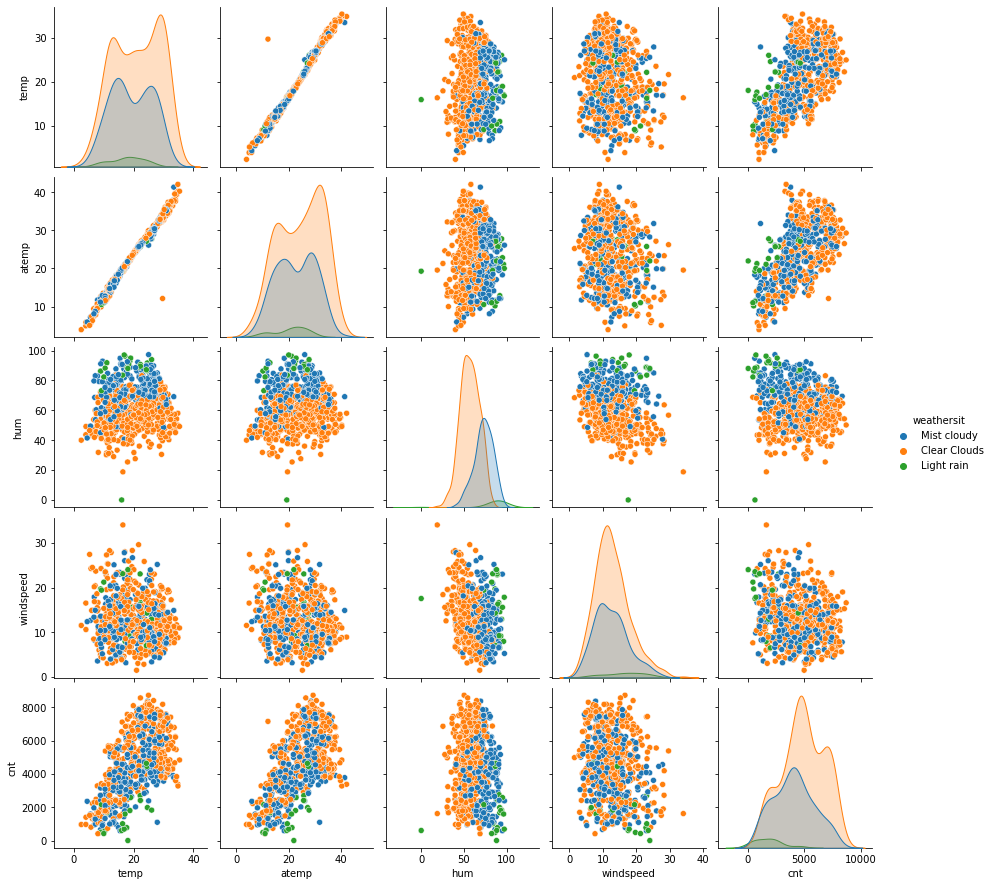

In [18]:
sns.pairplot(df,vars =['temp','atemp','hum','windspeed','cnt'],hue="weathersit")
plt.show()

## CNT is highly correlated  with temp and atemp we can remove one of the variable preferable temp to avoid multicollinarity.

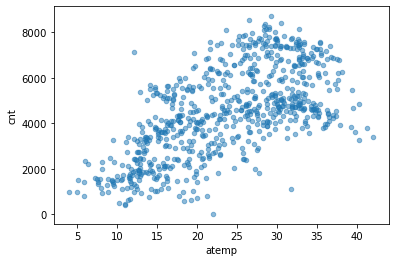

In [19]:
df.plot(kind='scatter', x='atemp', y='cnt', alpha=0.5)
plt.show()

__Good Correlation between atemp and cnt__

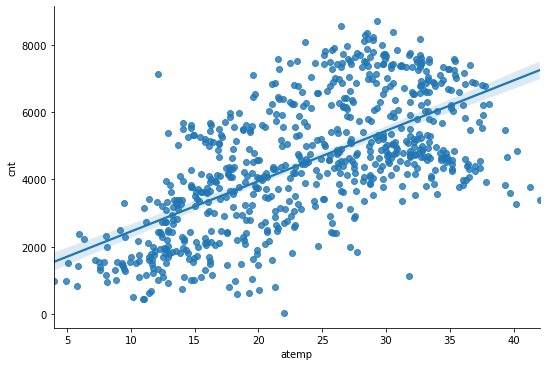

In [20]:
sns.lmplot(x='atemp', y='cnt', data=df, aspect=1.5, scatter_kws={'alpha':0.8})

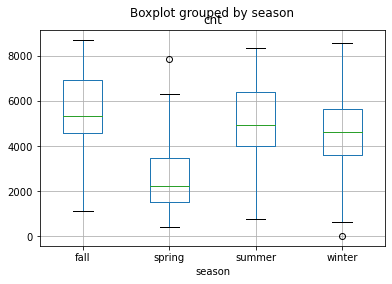

In [21]:
df.boxplot(column='cnt', by='season')
plt.show()

### Count is high for the fall season then followed by summer and winter.
### Spring is the lowest count.


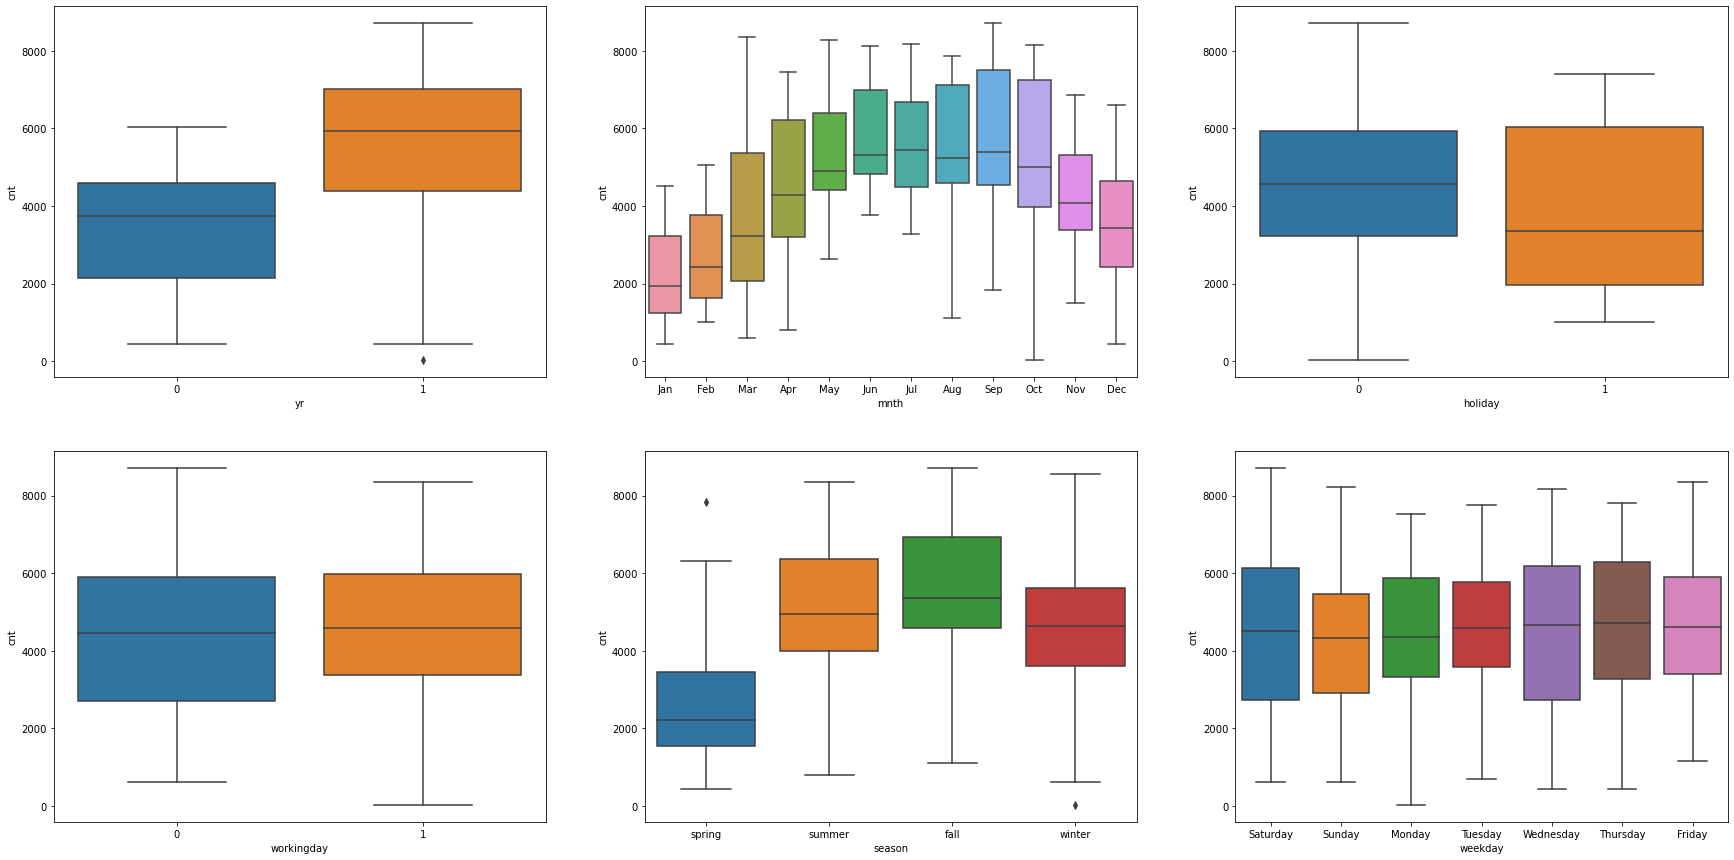

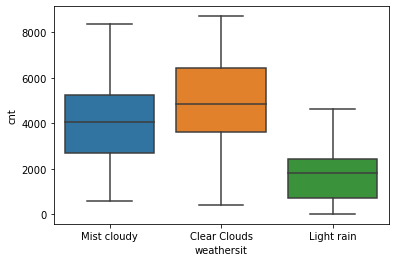

In [22]:
plt.figure(figsize=(30, 15))
plt.subplot(2,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.show()
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

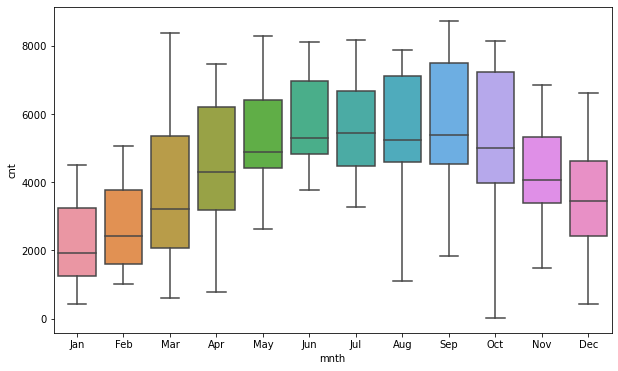

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.show()

#### Monthly count is more in March, April, September, October.

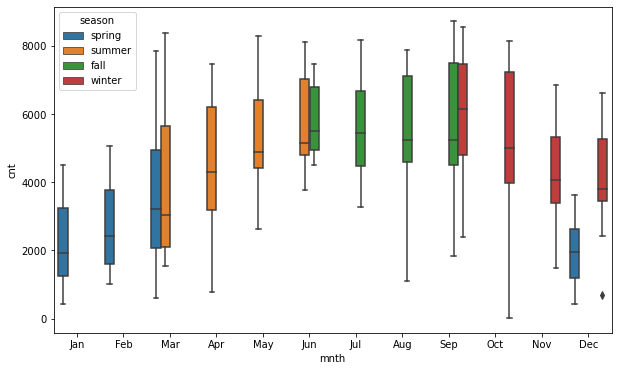

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'mnth', y = 'cnt',hue='season', data = df)
plt.show()

### Summer, Winter and Fall there is a good business.

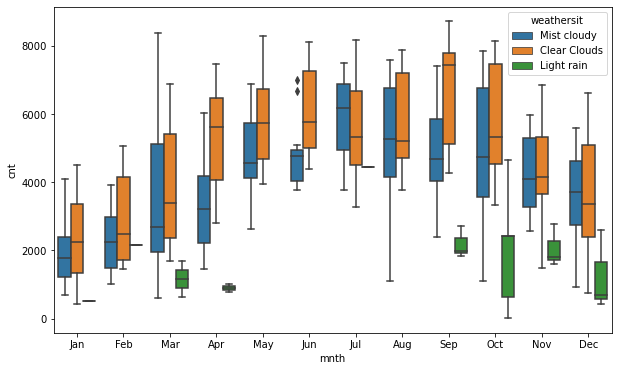

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'mnth', y = 'cnt',hue='weathersit', data = df)
plt.show()


#### More Count when there is a clear clouds followed by Misty Cloud.

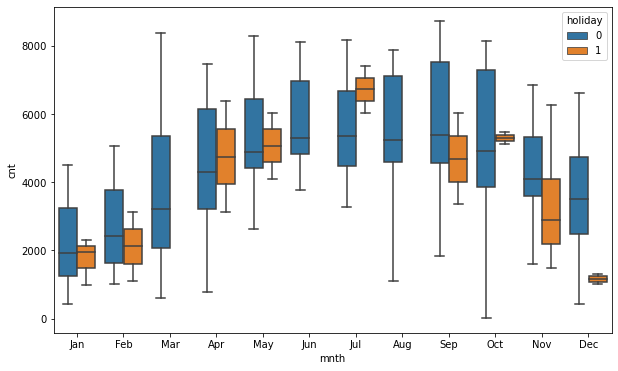

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'mnth', y = 'cnt',hue='holiday', data = df)
plt.show()


#### During Holidays there is a good business.

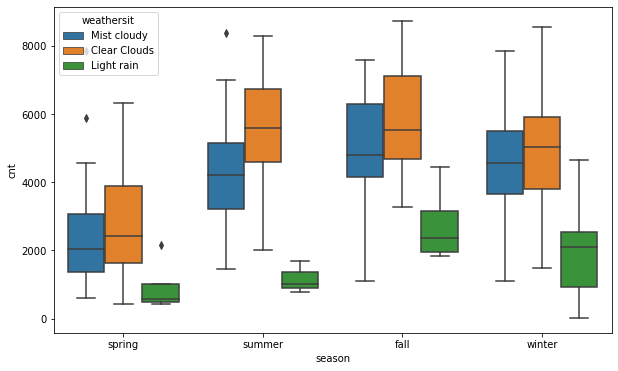

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'season', y = 'cnt',hue='weathersit', data = df)
plt.show()

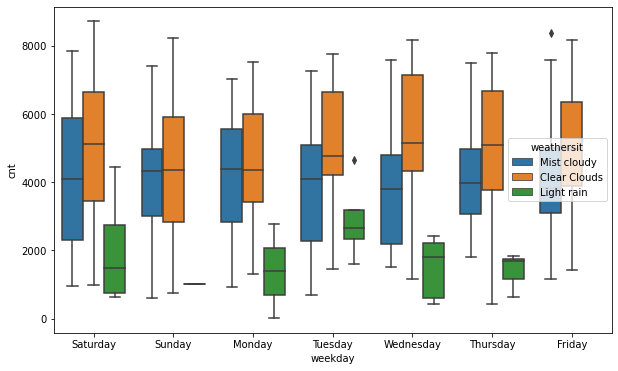

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'weekday', y = 'cnt',hue='weathersit', data = df)
plt.show()

#### There is a good count except the rainy days on the weekdays.
#### Saturdays and Wednesday there is a good count.


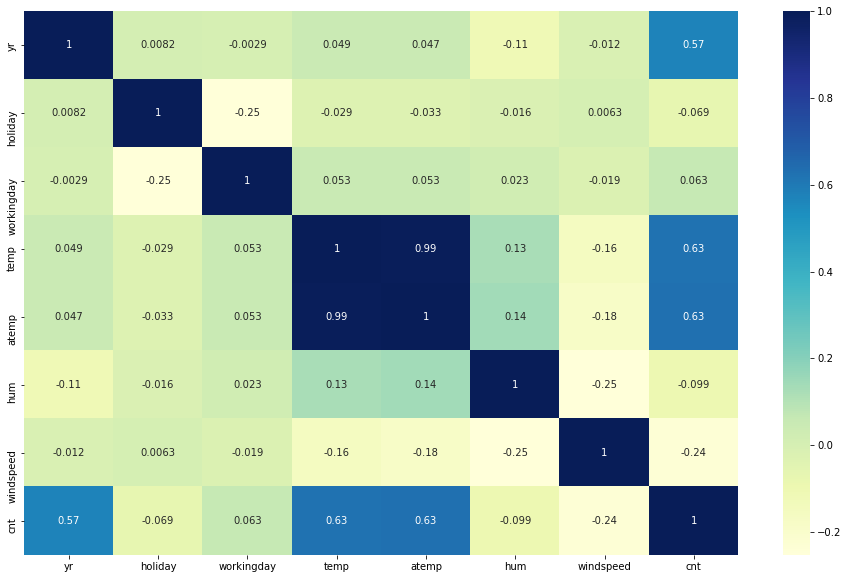

In [29]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [30]:
df.drop('temp',axis=1, inplace = True)

#### Temp and Atemp are both are having high corellation. It is better to drop Temp column to avoid the multicolliranity.

## Creating the dummy variables for  the categorical variable.

In [31]:
#Convert variables to object type
df['mnth']=df['mnth'].astype(object)
df['season']=df['season'].astype(object)
df['weathersit']=df['weathersit'].astype(object)
df['weekday']=df['weekday'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [32]:
seasons=pd.get_dummies(df['season'],drop_first=True)
df=pd.concat([df,seasons],axis=1)
df.drop('season',axis=1,inplace = True)


In [33]:
weather=pd.get_dummies(df['weathersit'],drop_first=True)
df=pd.concat([df,weather],axis=1)
df.drop('weathersit',axis=1,inplace = True)


In [34]:
wkday=pd.get_dummies(df['weekday'],drop_first=True)
df=pd.concat([df,wkday],axis=1)
df.drop('weekday',axis=1,inplace = True)

In [35]:
month=pd.get_dummies(df['mnth'],drop_first=True)
df=pd.concat([df,month],axis=1)
df.drop('mnth',axis=1,inplace = True)

## Splitting the train and test data 

In [36]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [37]:
df_train.shape

(510, 29)

In [38]:
df_test.shape

(219, 29)

In [39]:
df.shape

(730, 29)

## Scaling using MinMaxscaler

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [41]:
num_vars = ['atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [42]:
## Removing the 'cnt' variable from the Train data set and assign to Y_train
y_train = df_train.pop('cnt')
X_train = df_train

In [43]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Light rain,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

## General Assestment of data using Statmodel.

In [45]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [46]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const          0.261656
yr             0.234176
holiday        0.021320
workingday     0.101138
atemp          0.419497
hum           -0.145605
windspeed     -0.168583
spring        -0.055055
summer         0.030819
winter         0.099787
Light rain    -0.254551
Mist cloudy   -0.062605
Monday        -0.026325
Saturday       0.096947
Sunday         0.042251
Thursday      -0.013201
Tuesday       -0.022156
Wednesday     -0.008112
Aug            0.036894
Dec           -0.054028
Feb           -0.040490
Jan           -0.073420
Jul           -0.020120
Jun            0.017822
Mar           -0.000636
May            0.035849
Nov           -0.047654
Oct            0.007796
Sep            0.091471
dtype: float64

In [47]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     101.9
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          4.12e-180
Time:                        16:43:19   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -991.7
Df Residuals:                     482   BIC:                            -873.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2617      0.035      7.468      

In [48]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,83.25
12,Saturday,19.34
13,Sunday,18.01
6,spring,10.74
8,winter,9.47
7,summer,8.23
25,Nov,6.77
26,Oct,6.59
17,Aug,6.24
3,atemp,5.95


___There are lot variables showing greater than 5. It is recommeded to use RFE for the variable selection___

## Analysis using RFE 

In [49]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [50]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', True, 1),
 ('Light rain', True, 1),
 ('Mist cloudy', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', False, 5),
 ('Thursday', False, 11),
 ('Tuesday', False, 10),
 ('Wednesday', False, 13),
 ('Aug', False, 6),
 ('Dec', True, 1),
 ('Feb', False, 3),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 8),
 ('Mar', False, 14),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1)]

In [51]:
## These columns having more significance after using the RFE method
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'spring', 'winter',
       'Light rain', 'Mist cloudy', 'Saturday', 'Dec', 'Jan', 'Jul', 'Nov',
       'Sep'],
      dtype='object')

In [52]:
X_train.columns[~rfe.support_]

Index(['workingday', 'summer', 'Monday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct'],
      dtype='object')

In [53]:
X_train_rfe = X_train[col]

In [54]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [55]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [56]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          9.67e-187
Time:                        16:43:19   Log-Likelihood:                 508.84
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     494   BIC:                            -917.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3662      0.032     11.425      

In [57]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.08
2,atemp,16.88
4,windspeed,4.03
6,winter,2.93
5,spring,2.89
8,Mist cloudy,2.26
0,yr,2.06
13,Nov,1.82
11,Jan,1.75
10,Dec,1.54


In [59]:
# Removing humdity variable.
X_train_hum = X_train_rfe.drop(["hum"], axis = 1)
X_train_hum.head()

,yr,holiday,atemp,windspeed,spring,winter,Light rain,Mist cloudy,Saturday,Dec,Jan,Jul,Nov,Sep
653,1,0,0.501133,0.300794,0,1,0,0,0,0,0,0,0,0
576,1,0,0.766351,0.264686,0,0,0,0,0,0,0,1,0,0
426,1,0,0.438975,0.255342,1,0,0,1,1,0,0,0,0,0
728,1,0,0.200348,0.663106,1,0,0,0,0,1,0,0,0,0
482,1,0,0.391735,0.188475,0,0,0,1,1,0,0,0,0,0


In [60]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_hum)

In [61]:
lm = sm.OLS(y_train,X_train_lm).fit() 

In [62]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.7
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.10e-184
Time:                        16:43:20   Log-Likelihood:                 501.21
No. Observations:                 510   AIC:                            -972.4
Df Residuals:                     495   BIC:                            -908.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2902      0.026     11.288      

In [63]:
X_train_lm = X_train_lm.drop(['const'], axis=1)

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm 
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.61
3,windspeed,3.98
5,winter,2.55
4,spring,2.36
0,yr,2.06
12,Nov,1.80
10,Jan,1.65
7,Mist cloudy,1.53
9,Dec,1.46
11,Jul,1.35


In [65]:
# Removing Saturday  variable where P Value > 0.05
X_train_temp = X_train_lm.drop(["Saturday"], axis =1)
X_train_temp.head()

,yr,holiday,atemp,windspeed,spring,winter,Light rain,Mist cloudy,Dec,Jan,Jul,Nov,Sep
653,1,0,0.501133,0.300794,0,1,0,0,0,0,0,0,0
576,1,0,0.766351,0.264686,0,0,0,0,0,0,1,0,0
426,1,0,0.438975,0.255342,1,0,0,1,0,0,0,0,0
728,1,0,0.200348,0.663106,1,0,0,0,1,0,0,0,0
482,1,0,0.391735,0.188475,0,0,0,1,0,0,0,0,0


In [66]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm1 = sm.add_constant(X_train_temp)

In [67]:
lm = sm.OLS(y_train,X_train_lm1).fit() 
# #Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.5
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.95e-185
Time:                        16:43:20   Log-Likelihood:                 499.52
No. Observations:                 510   AIC:                            -971.0
Df Residuals:                     496   BIC:                            -911.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2931      0.026     11.396      

In [68]:
## Predicting the Y train using X Train
y_train_pred = lm.predict(X_train_lm1)

Text(0.5, 0, 'Errors')

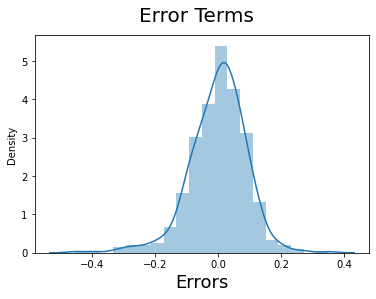

In [69]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [70]:
num_vars = ['atemp','hum','windspeed','cnt']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
184,0,1,0,0.778767,0.534223,0.149393,0.704300,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.855132,0.470417,0.231142,0.725421,0,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.492359,0.777843,0.443398,0.278853,0,0,1,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.805661,0.236659,0.449707,0.545512,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.749249,0.070765,0.682387,0.569148,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [71]:
y_test = df_test.pop('cnt')
X_test = df_test
y_test.head()

184    0.704300
535    0.725421
299    0.278853
221    0.545512
152    0.569148
Name: cnt, dtype: float64

In [72]:
X_test_new = X_test[X_train_temp.columns]

In [73]:
X_test_new.shape

(219, 13)

In [74]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test_new)

In [75]:
y_pred = lm.predict(X_test_m4)

Text(0, 0.5, 'y_pred')

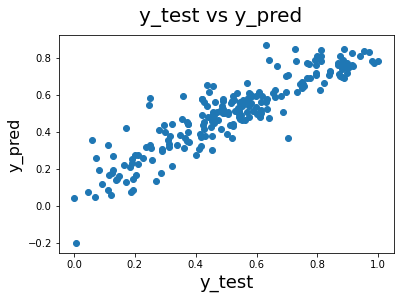

In [76]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [77]:
#Calculate the r square for test
r_squared = r2_score(y_test, y_pred)
print('R Square value',r_squared)

R Square value 0.8077548151514604


In [78]:
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.5
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.95e-185
Time:                        16:43:21   Log-Likelihood:                 499.52
No. Observations:                 510   AIC:                            -971.0
Df Residuals:                     496   BIC:                            -911.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2931      0.026     11.396      

# Feedback

## The most influencing factors.

  ### Year
    
  ### Atemp (feeling temperature in Celsius)
    
## Month

___*September Month is having a positive influence may be because of end of fall climate  and winter climate starting.___

__*Jan,Jul,Nov,Dec is having a negative influence may be because of mixed climate along with rain.___

## Climate
___*Winter climate is having a positive influence may be people love the starting of winter climate.___

___*Spring climate is having a negative influence___

## Weathersit
___*Misty cloud is a negative influence which reduce the business.___

___*Light Rain is having negative influence which reduce the business.___

## Others
___*Holidays is having a negative influence may be people are using other mode of transport.___

___*Windspeed is place the major role because if the more wind then it will be difficult to use the cycles.___
